# Discrete Choice Dynamic Programming
### by [Jason DeBacker](http://jasondebacker.com), November 2019
This Jupyter notebook will introduce you to the theory of discrete choice dynamic programming and solve an example problem using value function iteration.

## Example: McCall job search model

Consider a simple search model of unemployment.  Workers try to maximize their discounted lifetime utility:
    
   $$ E \sum_{t=0}^{\infty}\beta^{t} u(y_{t}) $$

It is assumed that $u'>0$, $u''<0$, and $\beta < 1$.

Employed workers earn a wage $w$ per period (labor supply is exogenous).  Unemployed workers get unemployment insurance of amount $c$ per period.  Thus, $y_{t}=w$ if employed in period $t$ and $y_{t}=c$ if unemployed in period $t$.

Workers transition between states of employment and unemployment.  With probability $\alpha$ an employed worker loses her job.  Unemployed workers reviece an offer each period to work for wage $w'$, which is drawn from the distribution $p$.  For simplicity, we assume no job search is undertaken on the job - employed workers work for the wage they've agreed to until exogenously separated from their job.

Unemployed workers have a decision to make.  They can accept the offer to work for $w'$ and begin work next period earning that wage.  Of they can reject the offer, remain unemployed, and recieve a job offer next period.

This problem is thus an example of a wider class of problems called *optimal stopping problems*.  The answer to this problem is the answer to the question - at what wage does it make sense for the worker to accept the offer rather than wait for a better one to come by?  Obviously this answer will depend on the risk aversion of the worker (i.e., the curvature of $u(\cdot)$, how much she discounts the future (given by $\beta$), and what the distribution of wages look like.

Let's write the Bellman equation describing this model.  In doing so, we need to consider that the worker can be in one of two states - employed or unemployed.  Let's let $U$ denote the lifetime value of being in the unemployed state today, $E(w)$ be the lifetime value of accepting and being employed at wage $w$, and $V(w)$ be the lifetime value of having a job offer at wage $w$.  Thus we have:


$$ E(w) = u(w) + \beta\left[\alpha U + (1-\alpha)E(w)\right] $$

and

$$ U = u(c) + \beta \int_{w'} V(w') \}dw' $$

and

$$ V(w) = \max\left\{U(w), E(w)\right\} $$


Let's solve this on the computer to illustrate how solving a discrete choice DPP works.


In [151]:
# imports
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Set parameter values
alpha = 0.2
beta = 0.98
c = 15.0  # unemployment compensation
sigma = 2.0  # CRRA for utility function

# discretize grid for w
n = 200  # number of possible outcomes for wage
w_vec = np.linspace(10, 60, n)  # wages between 10 and 20
            
# probabilities for each value of w -- assume drawn from a beta distribution
a, b = 5, 5  # shape parameters of beta
pdf = scipy.stats.beta.pdf(w_vec / (1.1 * w_vec.max()), a, b)
p_vec = pdf / pdf.sum()

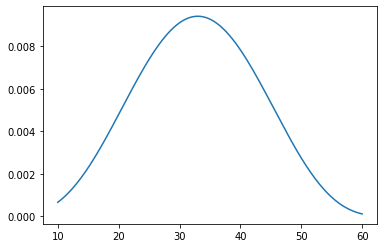

In [152]:
# Plot distributino of wages
plt.plot(w_vec, p_vec)
plt.show()

In [153]:
# A default utility function
def u(c, sigma):
    return (c ** (1 - sigma) - 1) / (1 - sigma)

In [150]:
# VFI 
VFtol = 1e-6
VFdist = 7.0
VFmaxiter = 3000
U = np.zeros_like(w_vec)#np.ones_like(w_vec) * (u(c, sigma) / (1 - beta))  # initial guess at value function for unemployed
E = np.zeros_like(w_vec)  #u(w_vec, sigma) / (1 - beta) # intial guess at value of being employed at each wage
V = np.max((U, E), axis=0)  # initial guess at value function
Vstore = np.empty((n, VFmaxiter))  # initialize Vstore array
VFiter = 1
while VFdist > VFtol and VFiter < VFmaxiter:
    EV = (p_vec * V).sum()  # expected VF, integrating over w'
    U = u(c, sigma) + beta * EV
    E = u(w_vec, sigma) + beta * ((alpha * U) + (1 - alpha) * E)
    TV = np.maximum(U, E)
    PF = E >= U  # PF is 0/1 (reject or accept offer)
    Vstore[:, VFiter] = V
    VFdist = (np.absolute(V - TV)).max()  # check distance between value
    print('VF iteration ', VFiter, ',  distance = ', VFdist)
    V = TV  # update value function
    # function for this iteration and value function from past iteration
    VFiter += 1

VF iteration  1 ,  distance =  1.1662666666666666
VF iteration  2 ,  distance =  1.1351236899425388
VF iteration  3 ,  distance =  1.1054267628820638
VF iteration  4 ,  distance =  1.0769898562906373
VF iteration  5 ,  distance =  1.049664101764309
VF iteration  6 ,  distance =  1.023333774409565
VF iteration  7 ,  distance =  0.9980339121612314
VF iteration  8 ,  distance =  0.9742066021041156
VF iteration  9 ,  distance =  0.9509402507114402
VF iteration  10 ,  distance =  0.9282241589912328
VF iteration  11 ,  distance =  0.9060481944830432
VF iteration  12 ,  distance =  0.8843990551157734
VF iteration  13 ,  distance =  0.8632669421237225
VF iteration  14 ,  distance =  0.8426396661783482
VF iteration  15 ,  distance =  0.8225052704282714
VF iteration  16 ,  distance =  0.8028520551367127
VF iteration  17 ,  distance =  0.7836685766267504
VF iteration  18 ,  distance =  0.7649436451884135
VF iteration  19 ,  distance =  0.7466676518727695
VF iteration  20 ,  distance =  0.72882990

VF iteration  350 ,  distance =  0.00026724179480908106
VF iteration  351 ,  distance =  0.0002609270304247957
VF iteration  352 ,  distance =  0.00025476148017133937
VF iteration  353 ,  distance =  0.0002487416181935487
VF iteration  354 ,  distance =  0.00024286400196871227
VF iteration  355 ,  distance =  0.0002371252703099458
VF iteration  356 ,  distance =  0.00023152214146193728
VF iteration  357 ,  distance =  0.00022605141121090355
VF iteration  358 ,  distance =  0.0002207099510513899
VF iteration  359 ,  distance =  0.0002154947064312296
VF iteration  360 ,  distance =  0.00021040269491123809
VF iteration  361 ,  distance =  0.00020543100460912456
VF iteration  362 ,  distance =  0.00020057679236629156
VF iteration  363 ,  distance =  0.00019583728227701158
VF iteration  364 ,  distance =  0.0001912097639831245
VF iteration  365 ,  distance =  0.0001866915912032141
VF iteration  366 ,  distance =  0.00018228018014099234
VF iteration  367 ,  distance =  0.0001779730080926356


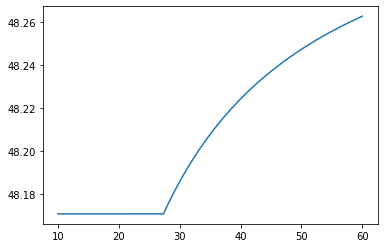

In [155]:
# plot value function:
plt.plot(w_vec, V)
plt.show()

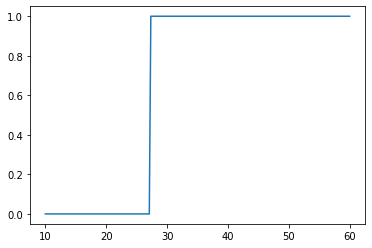

In [156]:
# plot policy function
plt.plot(w_vec, PF)
plt.show()

In [158]:
# see wage that is reservation wage
w_vec[PF][0]

27.336683417085425